In [17]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams.update({'font.size': 12})

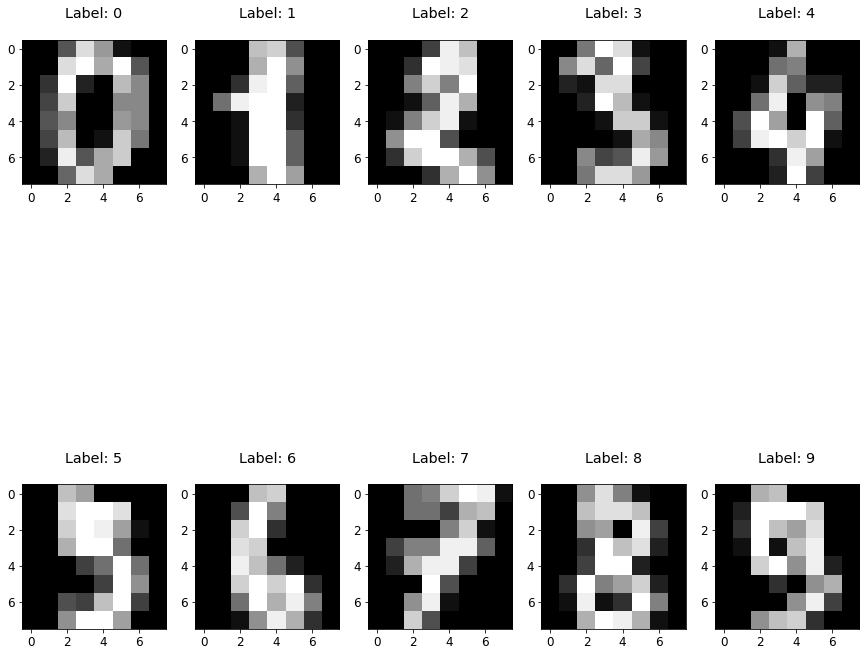

In [18]:
digits = load_digits()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(digits.data[i], (8, 8)), cmap='gray')
    plt.title('Label: %i\n' % digits.target[i])#, fontsize=25)
    
# https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
# dataset contains 8x8 images of various peoples' handwriting of 0-9 (random order)

In [19]:
#ndigits, area = digits.data.shape
# (1797 images; each 8x8 pixels)
unique_keys, counts = np.unique(digits.target, return_counts=True)
for i in range(len(unique_keys)):
    print('Key: {}, Val: {}'.format(unique_keys[i], counts[i]))
print('Total:', sum(counts))
#dict(zip(unique_keys,counts))

Key: 0, Val: 178
Key: 1, Val: 182
Key: 2, Val: 177
Key: 3, Val: 183
Key: 4, Val: 181
Key: 5, Val: 182
Key: 6, Val: 181
Key: 7, Val: 179
Key: 8, Val: 174
Key: 9, Val: 180
Total: 1797


In [20]:
# feature vector: entire image. label vector.
# NOTE: random state is currently 42, not random!
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=test_size, random_state=42)

In [21]:
# KNN
knn_neighbors = 6
knn_classifier = KNeighborsClassifier(n_neighbors=knn_neighbors)
knn_classifier.fit(X_train, y_train) # training
knn_y_pred = knn_classifier.predict(X_test) # testing
# (compare knn_testres with y_test)

In [22]:
# SGD (linear regression function; default method is 'hinge' (SVN))
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
sgd_y_pred = sgd_classifier.predict(X_test)

In [23]:
# DT
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)

In [24]:
# accuracy, recall, confusion matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics

print('COMP9517 Week 5, Lab 4 - z5075018\n')
print('Test size = {}'.format(test_size))

vals = [['KNN', knn_y_pred], ['SGD', sgd_y_pred], ['DT', dt_y_pred]]
for title, y_pred in vals:
    print('{:3} Accuracy:  {:.3f}     Recall: {:.3f}'.format( 
        title, 
        metrics.accuracy_score(y_test, y_pred), 
        metrics.recall_score(y_test, y_pred, average='weighted') 
    ))

for title, y_pred in vals:
    print('\n')
    print('{} Confusion Matrix:'.format(title))
    print(metrics.confusion_matrix(y_test, y_pred))

#print('KNN Accuracy:  {:.3f}     Recall: {:.3f}'.format( metrics.accuracy_score(y_test, knn_y_pred), metrics.recall_score(y_test, knn_y_pred) ))
#print('SGD Accuracy:  {:.3f}     Recall: {:.3f}'.format( metrics.accuracy_score(y_test, sgd_y_pred), metrics.recall_score(y_test, sgd_y_pred) ))
#print('DT  Accuracy:  {:.3f}     Recall: {:.3f}'.format( metrics.accuracy_score(y_test,  dt_y_pred), metrics.recall_score(y_test,  dt_y_pred) ))

COMP9517 Week 5, Lab 4 - z5075018

Test size = 0.25
KNN Accuracy:  0.996     Recall: 0.996
SGD Accuracy:  0.960     Recall: 0.960
DT  Accuracy:  0.869     Recall: 0.869


KNN Confusion Matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  1  1  0  0  0 46]]


SGD Confusion Matrix:
[[42  0  0  0  0  0  0  1  0  0]
 [ 0 34  2  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  0  0  0 54  0  1  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  1  0 40  0  0]
 [ 0  1  0  2  0  0  0  0 35  0]
 [ 0  0  0  3  0  1  0  0  2 42]]


DT Confusion Matrix:
[[41  0  0  0  1  0  0  1  0  0]
 [ 0 33  2  0  0  0  0  0  0  2]
 [ 0  3 29  1  0  0  0  2  2  1]

In [25]:
# KNN parameter testing
for n in range(1,11):
    new_knn_classifier = KNeighborsClassifier(n_neighbors=n)
    new_knn_classifier.fit(X_train, y_train) # training
    y_pred = new_knn_classifier.predict(X_test) # testing
    print('KNN[{:2}] Accuracy:  {:.3f}     Recall: {:.3f}'.format( 
        n, 
        metrics.accuracy_score(y_test, y_pred), 
        metrics.recall_score(y_test, y_pred, average='weighted') 
    ))
    
# NOTE: KNN performs best

KNN[ 1] Accuracy:  0.982     Recall: 0.982
KNN[ 2] Accuracy:  0.984     Recall: 0.984
KNN[ 3] Accuracy:  0.987     Recall: 0.987
KNN[ 4] Accuracy:  0.987     Recall: 0.987
KNN[ 5] Accuracy:  0.993     Recall: 0.993
KNN[ 6] Accuracy:  0.996     Recall: 0.996
KNN[ 7] Accuracy:  0.993     Recall: 0.993
KNN[ 8] Accuracy:  0.989     Recall: 0.989
KNN[ 9] Accuracy:  0.987     Recall: 0.987
KNN[10] Accuracy:  0.987     Recall: 0.987
